In [5]:
# Importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df_original =pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data CLeanup
df_original['job_posted_date']=pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills']=df_original['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Filtering Data for United States

In [6]:
df_US=df_original[df_original['job_country']=='United States']

In [7]:
df_skills=df_US.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


Counting Skills per Job Title

In [8]:
df_skill_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skill_count=df_skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


Top 3 Roles

In [9]:
job_titles=df_skill_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

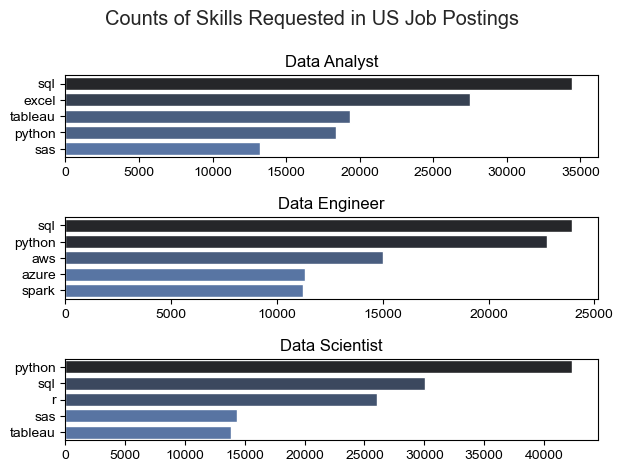

In [10]:
fig, ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

# Plot
for i, job_title in enumerate(job_titles):
    df_plot=df_skill_count[df_skill_count['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,
                x='skill_count',
                y='job_skills',
                hue='skill_count',
                palette='dark:b_r',
                ax=ax[i])
    ax[i].set(ylabel='',xlabel='',title=job_title)
    ax[i].get_legend().remove()

fig.suptitle('Counts of Skills Requested in US Job Postings')
plt.tight_layout()

Counts Convert to Percentage

In [12]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [21]:
df_skills_percentage=df_skill_count.merge(df_job_title_count,how='left',on='job_title_short')
df_skills_percentage['skill_percentage']=(df_skills_percentage['skill_count']/df_skills_percentage['job_total'])*100
df_skills_percentage

,job_skills,job_title_short,skill_count,job_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


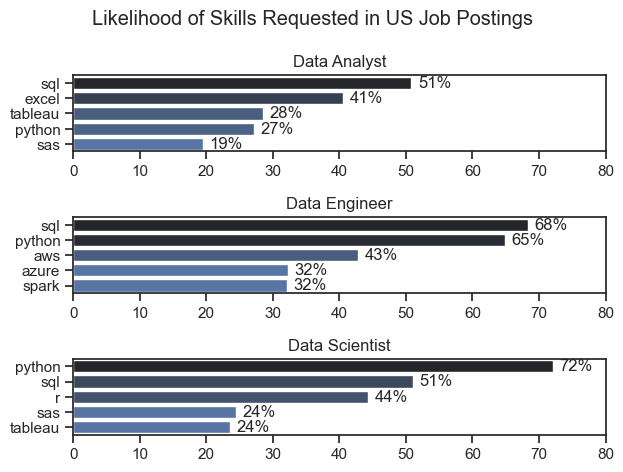

In [30]:
fig, ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

# Plot
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_percentage[df_skills_percentage['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,
                x='skill_percentage',
                y='job_skills',
                hue='skill_percentage',
                palette='dark:b_r',
                ax=ax[i])
    ax[i].set(ylabel='',xlabel='',title=job_title,xlim=(0,80))
    ax[i].get_legend().remove()
    for n,v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings')
plt.tight_layout()